Size of original photo: (632, 980, 3)


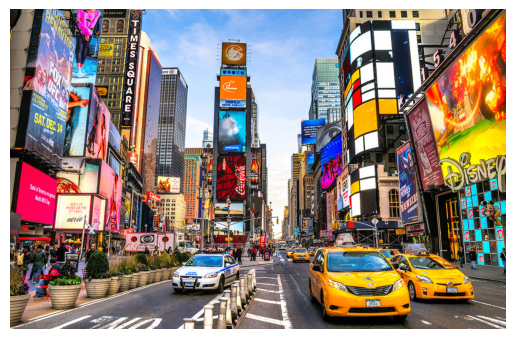

In [17]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

image_raw = imread('new_york.jpeg')
print(f"Size of original photo: {image_raw.shape}")
plt.imshow(image_raw)
plt.axis("off")
plt.show()

Size of black-white photo(632, 980)


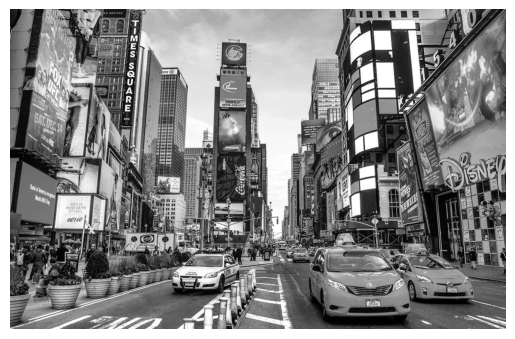

In [11]:
image_sum = image_raw.sum(axis=2)
image_bw = image_sum/image_sum.max()
print(f"Size of black-white photo{image_bw.shape}")
plt.imshow(image_bw, "gray")
plt.axis("off")
plt.show()

Number of components explaining 95% variance: 146


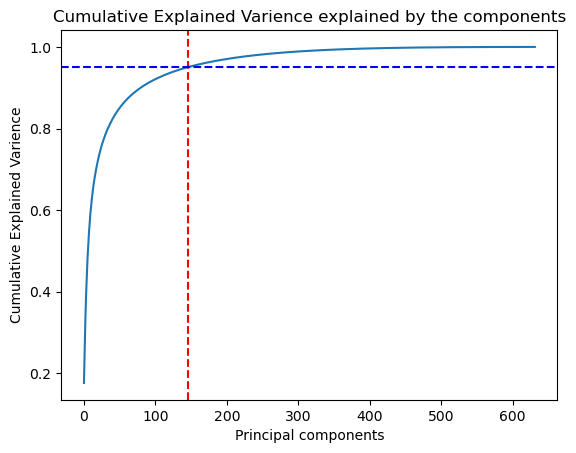

In [54]:
pca = PCA()
pca.fit(image_bw)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
components = 0
for i, value in enumerate(cumulative_variance):
    if value >= 0.95:
        components = i + 1
        break
print(f"Number of components explaining 95% variance: {components}")
plt.plot(cumulative_variance)
plt.xlabel("Principal components")
plt.ylabel("Сumulative Explained Varience")
plt.title("Cumulative Explained Varience explained by the components")
plt.axvline(components, color='r', linestyle='--')
plt.axhline(y=0.95, color='b', linestyle='--')
plt.show()


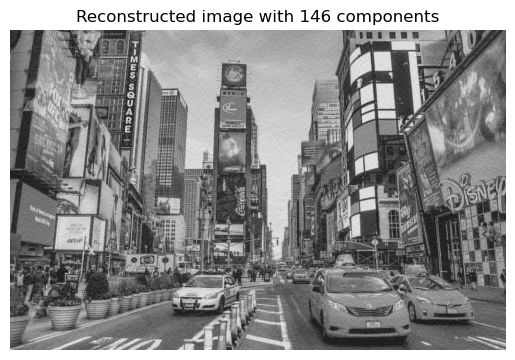

In [55]:
pca = PCA(n_components=components)
bw_transform = pca.fit_transform(image_bw)
bw_reconstructed = pca.inverse_transform(bw_transform)
plt.imshow(bw_reconstructed, cmap='gray')
plt.title(f"Reconstructed image with {components} components")
plt.axis('off')
plt.show()

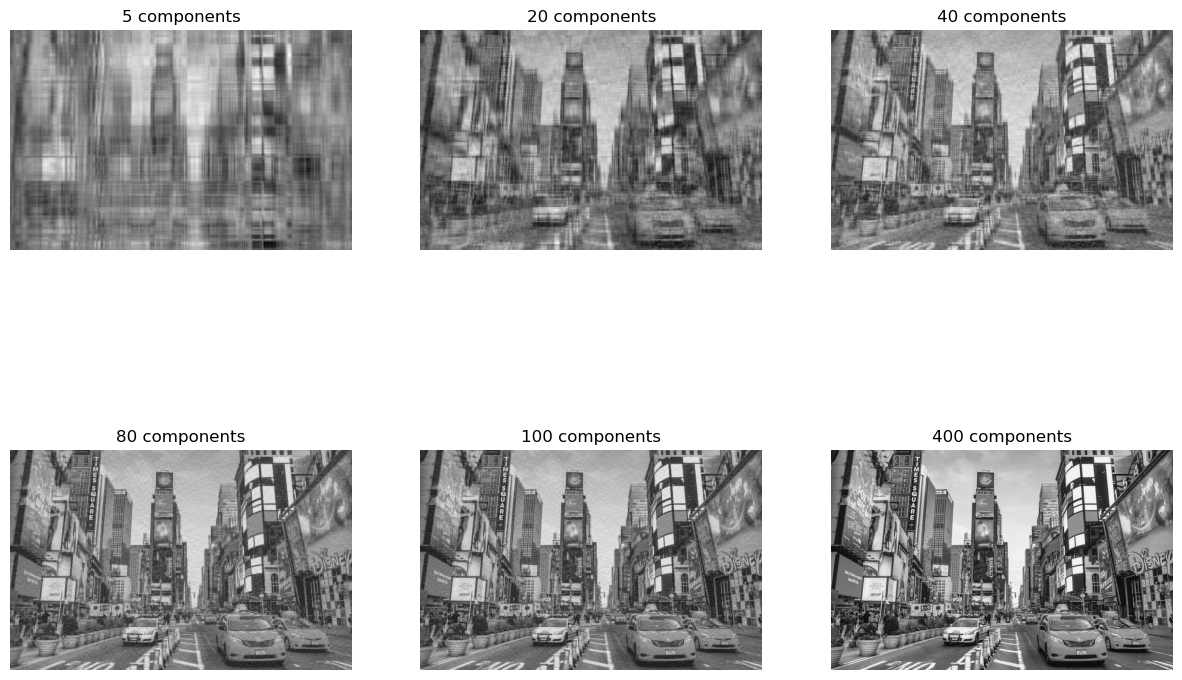

In [71]:
components_list = [5, 20, 40, 80, 100, 400]
plt.figure(figsize=(15, 10))
for i, compon in enumerate(components_list, 1):
    pca = PCA(n_components=compon)
    bw_transform = pca.fit_transform(image_bw)
    bw_reconstructed = pca.inverse_transform(bw_transform)
    plt.subplot(2, 3, i)
    plt.imshow(bw_reconstructed, cmap='gray')
    plt.title(f"{compon} components")
    plt.axis('off')

plt.show()
